In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set()
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

import xgboost as xgb
import joblib
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import shap

In [2]:
data = pd.read_csv('../../4_PFmodel/data/PFdata4ML.csv')

X = data.iloc[:,data.columns != "pf_log"]
ypf = data.iloc[:,data.columns == "pf_log"]

cols = ['T', 
        'Density', 
        'Av.enallen', 
        'Av.vdwrad', 
        'Su.unf', 
        'Va.boilp', 
        'Va.hhip', 
        'Va.unf', 
        'Va.punf', 
        'Va.sunf',
        'Va.sval',
        'Ma.hhip',
        'Ma.unf',
        'Ma.punf',
        'Ma.sunf',
        'Mi.elecaff',
        'Mi.lattc',
        'Mi.sval',
        'DC1',
        'PC2',
        'SC4']

scaler.fit(X)
X_scaler = scaler.transform(X)
X_scaler_pd = pd.DataFrame(X_scaler)
X_scaler_pd.columns = cols

model = joblib.load(r'../../4_PFmodel/1_RF/RF.model')

In [3]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_scaler_pd)
print(shap_values.shape)

(365, 21)


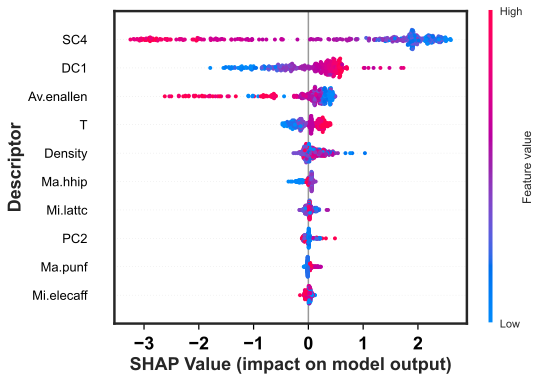

In [5]:
fig, axes = plt.subplots(1, 1, sharey=True, figsize=(5, 6))
sns.set_style('ticks')

summary = shap.summary_plot(
    shap_values, 
    X_scaler_pd,
    max_display = 10,
    feature_names = cols,
    show = False,
    plot_type = 'dot',
    plot_size=0.4,
    use_log_scale = False,
    axis_color = "#000000",
)

axes.spines['top'].set_visible(True)
axes.spines['right'].set_visible(True)
axes.spines['bottom'].set_visible(True)
axes.spines['left'].set_visible(True)

axes.spines['bottom'].set_linewidth(2.5)
axes.spines['left'].set_linewidth(2.5)
axes.spines['top'].set_linewidth(2.5)
axes.spines['right'].set_linewidth(2.5)

plt.xlabel(
    'SHAP Value (impact on model output)',
           fontsize=18,
          fontweight='bold')

plt.ylabel(
    'Descriptor',
           fontsize=18,
          fontweight='bold')

plt.xticks(
    fontsize=18,
    fontweight='bold')

plt.tight_layout()